In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob, inspect, sys
from sksurv.nonparametric import kaplan_meier_estimator
from sksurv.linear_model import CoxPHSurvivalAnalysis

from lifelines.plotting import plot_lifetimes


In [37]:
data = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Merged_data/Survival_df.csv'),
                  index_col=0)

In [38]:
data_GAN = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Merged_data/CopulaGAN_simulated_data_survival.csv'),
                  index_col=None)

In [39]:
data_x = data.iloc[:, 2:]
data_y = data.iloc[:, 0:2]

In [40]:
data_GAN_x = data_GAN.iloc[:, 2:]
data_GAN_y = data_GAN.iloc[:, 0:2]

## Lifetime

### Actual

Text(0.5, 1.0, 'Failure at $cycle=1e6$')

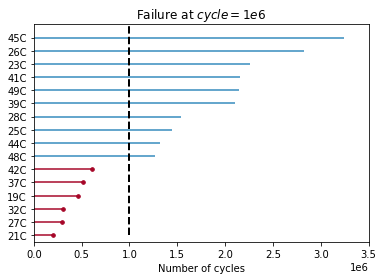

In [41]:
current_time = 1000000

observed_lifetimes = np.minimum(data['F_Time'], current_time)
death_observed = data['F_Time'] < current_time

ax = plot_lifetimes(data['F_Time'], event_observed=death_observed)

ax.set_xlim(0, 3500000)
ax.vlines(1000000, 0, 30, lw=2, linestyles='--')
ax.set_xlabel("Number of cycles")
ax.set_title("Failure at $cycle=1e6$")

## Kaplan Meier

### Actual

Text(0.5, 0, 'time $t$')

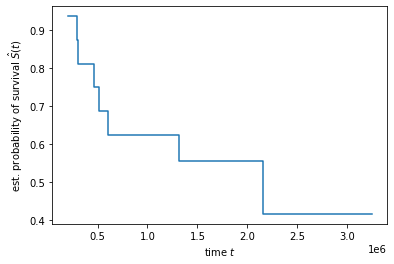

In [42]:
time, survival_prob = kaplan_meier_estimator(data_y["Observed"], data_y["F_Time"])
plt.step(time, survival_prob, where="post")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")

### Synthetic

Text(0.5, 0, 'time $t$')

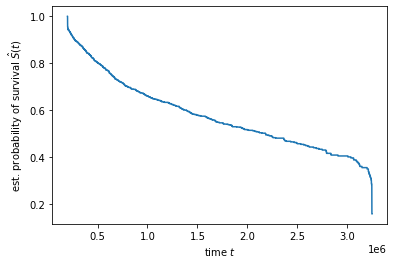

In [44]:
time, survival_prob = kaplan_meier_estimator(data_GAN_y["Observed"], data_GAN_y["F_Time"])
plt.step(time, survival_prob, where="post")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")

## Kaplan Meier by 'age' i.e. cycle at NDE

### Actual

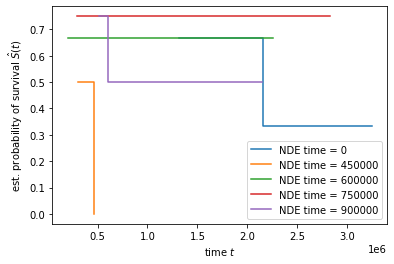

In [45]:
for age in [0, 450000, 600000, 750000, 900000]:
    mask_treat = data_x["NDE_cycle"] == age
    time_age, survival_prob_age = kaplan_meier_estimator(
        data_y["Observed"][mask_treat],
        data_y["F_Time"][mask_treat])

    plt.step(time_age, survival_prob_age, where="post",
             label="NDE time = %s" % age)

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")

### Synthetic

In [46]:
data_GAN_x

,NDE_cycle,diff_two_peaks_ratio,amp_ratio,pos_ratio,energy_ratio,NLE_ratio_51_17,NLE_ratio_85_17,NLE_ratio_119_17,NLO_avg,Avg_RP,ACEE_30_Avg_58,ACEE_500_Avg_58,ACPD_Avg_58
0,600000,0.652425,1.246098,0.997119,0.904570,0.920096,1.088206,0.467396,5.735330,175.609656,-0.770646,-1.285146,3.326268
1,450000,0.720146,1.262309,0.993423,0.980101,0.857370,1.101848,0.467855,3.645883,169.717689,-0.581949,-1.358144,2.985542
2,750000,0.563658,1.160935,0.996580,0.750480,0.884058,1.077712,0.470394,7.851831,170.982320,-0.769570,-1.502093,3.510375
3,900000,0.514807,1.037140,1.000231,0.737361,0.907228,1.150152,0.488943,5.009504,171.280515,-1.024741,-1.227602,2.845183
4,900000,0.379343,1.170794,0.998513,0.826376,0.896547,1.162720,0.488752,5.828494,170.252894,-0.828375,-1.248879,3.067759
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,900000,0.552311,1.175387,0.997886,0.907612,0.882277,1.120056,0.485095,7.860860,170.004194,-0.771458,-0.896907,4.420880
996,0,1.976501,1.194383,0.993424,1.446834,0.895328,1.135725,0.482671,3.692038,186.416143,-0.131110,-3.008475,4.146605
997,750000,0.306940,1.017359,1.002774,0.624054,0.916610,1.100316,0.483606,6.820040,174.078034,-0.866947,-1.642809,3.278346
998,450000,0.681572,1.276485,1.002120,1.314244,0.984665,1.245225,0.529420,3.785093,170.268408,-0.876770,-1.520067,3.746101


In [47]:
data_GAN_x["NDE_cycle"] == 0

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996     True
997    False
998    False
999     True
Name: NDE_cycle, Length: 1000, dtype: bool

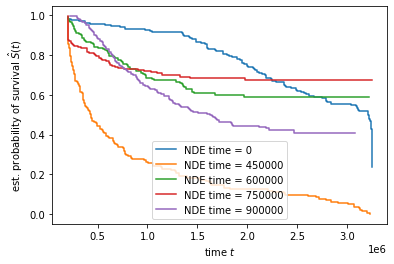

In [48]:
for age in [0, 450000, 600000, 750000, 900000]:
    mask_treat = data_GAN_x["NDE_cycle"] == age
    time_age, survival_prob_age = kaplan_meier_estimator(
        data_GAN_y["Observed"][mask_treat],
        data_GAN_y["F_Time"][mask_treat])

    plt.step(time_age, survival_prob_age, where="post",
             label="NDE time = %s" % age)

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")